In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential, load_model
import numpy as np
from tensorflow.keras.losses import categorical_crossentropy as cce
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.utils import to_categorical

import h5py
from sklearn import utils
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
import seaborn as sns

In [33]:
modelE = keras.models.Sequential()
modelE.add(Conv2D(32, (3, 3), input_shape=(128, 128,1)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(32, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelE.add(Dense(64))
modelE.add(Activation('relu'))
modelE.add(Dropout(0.5))
modelE.add(Dense(2))
modelE.add(Activation('softmax'))

modelE.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [3]:
garbage = np.load('20200514_garbage__Chiral_D_Large_TIFF_Cropped_four_rows_sel_NPs_rotated.npy')

In [4]:
garbage.shape

(160, 128, 128)

In [5]:
right = np.load('20200514_right__Chiral_D_Large_TIFF_Cropped_four_rows_sel_NPs_rotated.npy')

In [6]:
right.shape

(383, 128, 128)

In [7]:
left = np.load('20200514_left__Chiral_D_Large_TIFF_Cropped_four_rows_sel_NPs_rotated.npy')

In [8]:
left.shape

(6, 128, 128)

In [9]:
383/2

191.5

In [16]:
label_garbage = [[0,1] for i in np.arange(0,160)]

In [17]:
label_garbage=np.array(label_garbage)

In [18]:
label_garbage.shape

(160, 2)

In [19]:
label_good = [[1,0] for i in np.arange(0,160)]

In [20]:
label_good = np.array(label_good)

In [27]:
new_left = np.array([np.fliplr(img)for img in right[:78]])

In [28]:
new_left.shape

(78, 128, 128)

In [29]:
new_left = np.concatenate((new_left,left[4:]))

In [38]:
new_left = utils.shuffle(new_left)

In [30]:
new_left.shape

(80, 128, 128)

In [48]:
new_right = right[78:]

In [47]:
56+12

68

In [53]:
garbage = np.array([(img-img.min())/(img.max()-img.min()) for img in garbage])
new_left = np.array([(img-img.min())/(img.max()-img.min()) for img in new_left])
new_right = np.array([(img-img.min())/(img.max()-img.min()) for img in new_right])

In [54]:
garbage.max()

1.0

In [55]:
garbage.min()

0.0

In [56]:
new_left.min()

0.0

In [57]:
new_left.max()

1.0

In [58]:
new_right.max()

1.0

In [59]:
new_right.min()

0.0

In [60]:
trainX = np.concatenate((garbage[:112],new_right[:56],new_left[:56]))
trainY = np.concatenate((label_garbage[:112],label_good[:112]))
trainX = utils.shuffle(trainX,random_state = 0)
trainX=np.expand_dims(trainX,axis=3)
trainY = utils.shuffle(trainY,random_state=0)
testX = np.concatenate((garbage[112:136],new_right[56:68],new_left[56:68]))
testY = np.concatenate((label_garbage[112:136],label_good[112:136]))
testX = utils.shuffle(testX,random_state = 0)
testX = np.expand_dims(testX,axis=3)
testY = utils.shuffle(testY,random_state=0)
valX = np.concatenate((garbage[136:],new_right[68:80],new_left[68:80]))
valY = np.concatenate((label_garbage[136:],label_good[136:]))
valX = utils.shuffle(valX,random_state = 0)
valX = np.expand_dims(valX,axis=3)
valY = utils.shuffle(valY,random_state=0)

In [61]:
i = h5py.File('20200514_garbage_detector_data.h5','w')
i.create_dataset('trainX', data=trainX)
i.create_dataset('trainY', data=trainY)
i.create_dataset('testX', data=testX)
i.create_dataset('testY', data=testY)
i.create_dataset('valX', data=valX)
i.create_dataset('valY', data=valY)
i.close()

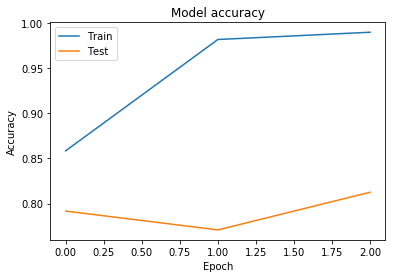

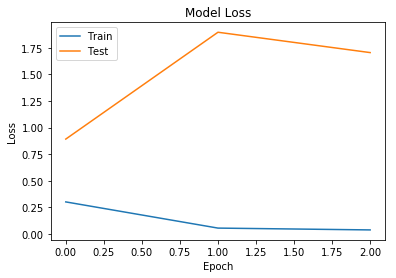

In [2]:
history = h5py.File('savio_nets/garbage_net_history_v3.h5','r')

list(history.keys())

plt.plot(history['acc'][:])
plt.plot(history['val_acc'][:])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

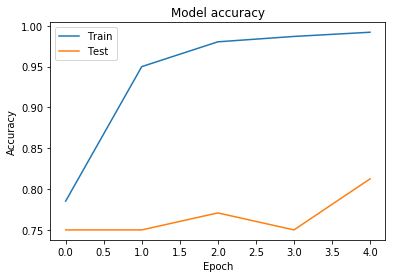

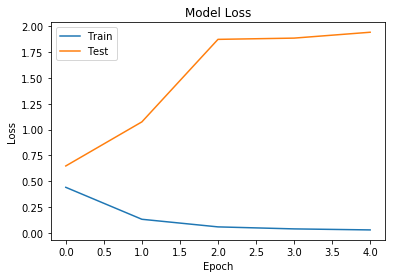

In [3]:
history = h5py.File('savio_nets/garbage_net_history_v4.h5','r')

list(history.keys())

plt.plot(history['acc'][:])
plt.plot(history['val_acc'][:])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [4]:
modelE = keras.models.Sequential()
modelE.add(Conv2D(64, (3, 3), input_shape=(128, 128,1)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(128, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(128, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(128, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelE.add(Dense(128))
modelE.add(Activation('relu'))
modelE.add(Dropout(0.5))
modelE.add(Dense(2))
modelE.add(Activation('softmax'))

modelE.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [32]:
valX = h5py.File('20200514_garbage_detector_data.h5','r')['valX'][:]
valY = h5py.File('20200514_garbage_detector_data.h5','r')['valY'][:]

In [7]:
modelE.load_weights('savio_nets/garbage_net_weights_v7.h5')

In [10]:
pred = modelE.predict(valX)

In [11]:
precision, recall, thresholds = metrics.precision_recall_curve(valY.flatten(), pred.flatten())

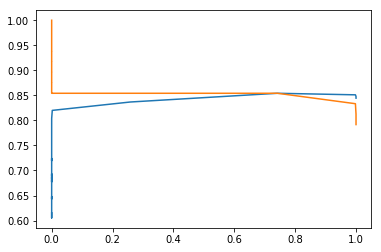

In [12]:
plt.plot(thresholds,precision[:-1])
plt.plot(thresholds,recall[:-1])

In [24]:
cfm = metrics.confusion_matrix(valY.flatten(),pred.flatten()>0.7,labels = [0,1])

In [25]:
cfm

array([[41,  7],
       [ 7, 41]])

In [15]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [16]:
new_inferno = cm.get_cmap('inferno', 512)
new_inferno = ListedColormap(new_inferno(np.linspace(0.1, 0.95, 256)))

In [18]:
cfm = cfm.astype('float') / cfm.sum(axis=0)[:, np.newaxis]

In [17]:
def plot_confusion_matrix(cfm, Y_labels,colormap, annotate = True, save=False):
    """Creates a confusion matrix for the different classes given a true labels,predictions, the dataset
    and the desired trained classfier"""
#     cfm = metrics.confusion_matrix(Y, Y_pred)
    cfm = cfm.astype('float') / cfm.sum(axis=1)[:, np.newaxis]


    plt.subplots(figsize=(5,5))
    plt.rcParams['font.size'] = 16
    if annotate == True:
        df_cfm = pd.DataFrame(data = cfm, columns=Y_labels, index=Y_labels)
        ax = sns.heatmap(df_cfm, annot=True,cmap=colormap,vmin=0,vmax=1,annot_kws={"size": 16},fmt=".2f")
        ax.collections[0].colorbar.set_yticklabels = []
        ax.set_ylabel('True label', fontsize = 16)
        ax.set_xlabel('Predicted label',fontsize = 16)
        plt.yticks(np.arange(2)+0.5,Y_labels, rotation=90, fontsize="14", va="center")
        plt.xticks(np.arange(2)+0.5,Y_labels,fontsize="14", va="center")
        plt.xticks(fontsize=14)
    else:
        ax = sns.heatmap(cfm, annot=False,cmap=colormap,vmin=0,vmax=1,xticklabels = False, yticklabels = False)
#     
    
    if save == True:
        fname = input('Specify filename to save figure to: ')
        fig = ax.get_figure()
        fig.savefig(fname)

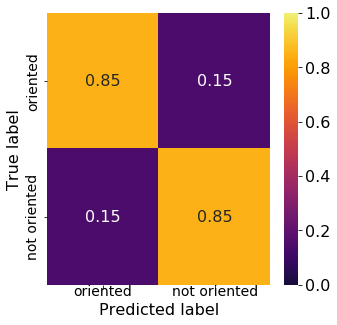

In [23]:
plot_confusion_matrix(cfm,['oriented','not oriented'],new_inferno)

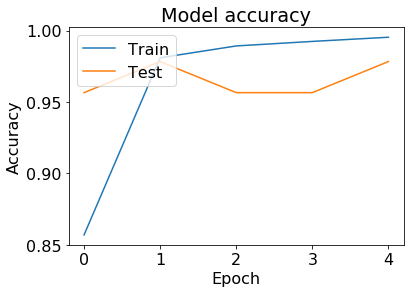

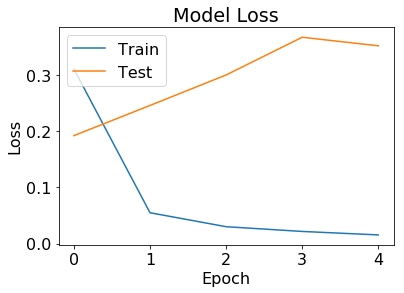

In [26]:
history = h5py.File('savio_nets/garbage_net_history_v11.h5','r')

list(history.keys())

plt.plot(history['acc'][:])
plt.plot(history['val_acc'][:])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [34]:
modelE.load_weights('savio_nets/garbage_net_weights_v11.h5')

In [36]:
valY = np.abs(valY-1)

In [37]:
modelE.evaluate(valX,valY)

2/2 [==============================] - 0s 24ms/step - loss: 2.7403 - accuracy: 0.7708


[2.740278482437134, 0.7708333134651184]

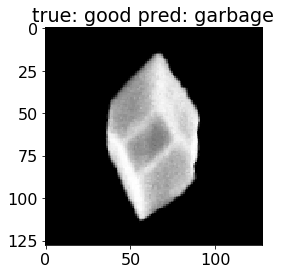

In [48]:
idx = 6
plt.imshow(valX[idx,:,:,0],cmap='gray')
p = pred[idx][0]
if p == 1:
    p = 'garbage'
else:
    p = 'good'
if valY[idx][0] == 1:
    plt.title('true: garbage pred: '+p)
else:
    plt.title('true: good pred: '+p)

In [49]:
pred = modelE.predict(valX)

In [50]:
cfm = metrics.confusion_matrix(valY.flatten(),pred.flatten()>0.7,labels = [0,1])

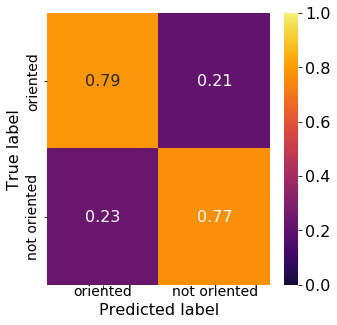

In [51]:
plot_confusion_matrix(cfm,['oriented','not oriented'],new_inferno)

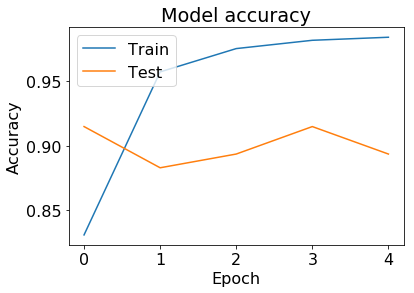

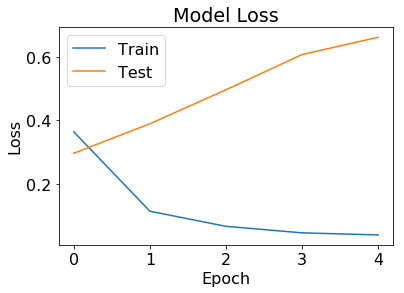

In [53]:
history = h5py.File('savio_nets/garbage_net_history_v12.h5','r')

list(history.keys())

plt.plot(history['acc'][:])
plt.plot(history['val_acc'][:])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [54]:
valY = np.abs(valY-1)

In [55]:
modelE.load_weights('savio_nets/garbage_net_weights_v12.h5')

In [56]:
modelE.evaluate(valX,valY)

2/2 [==============================] - 0s 21ms/step - loss: 0.9325 - accuracy: 0.8750


[0.9324626922607422, 0.875]

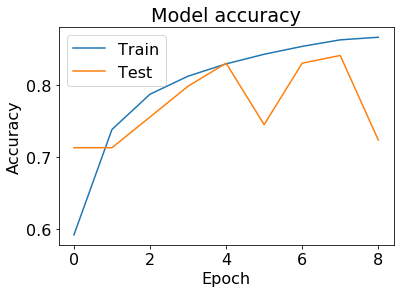

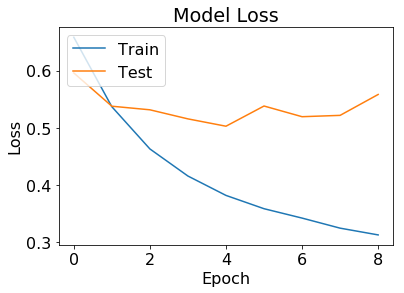

In [57]:
history = h5py.File('savio_nets/garbage_net_history_v13.h5','r')

list(history.keys())

plt.plot(history['acc'][:])
plt.plot(history['val_acc'][:])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

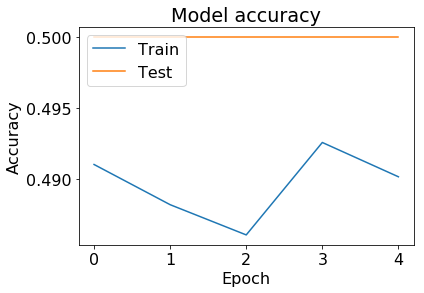

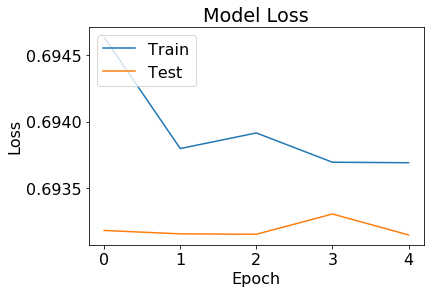

In [58]:
history = h5py.File('savio_nets/garbage_net_history_v14.h5','r')

list(history.keys())

plt.plot(history['acc'][:])
plt.plot(history['val_acc'][:])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()